Chapter 06

# 绘制规范正交基网格
《线性代数》 | 鸢尾花书：数学不难

这段代码的核心任务是**构造并可视化二维欧几里得空间中一组经过旋转变换后的规范正交基向量和相应的格点结构**，展示一个由单位圆、基底向量及其张成的网格组成的几何图像。下面我们从数学角度逐步详细解释整个流程。

---

首先，定义旋转角 $\theta = \frac{\pi}{3}$，也就是 $60^\circ$。基于该角度构造了一个二维的**正交变换矩阵**（也是一个**旋转矩阵**）：

$$
A = \begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$

矩阵 $A$ 代表在二维平面上**绕原点逆时针旋转 $\theta$ 弧度的线性变换**。这种矩阵具有以下两个性质：

1. $A^\top A = I$，即 $A$ 是一个正交矩阵；
2. $\det(A) = 1$，说明它是一个**保距离、保面积**的旋转。

我们从矩阵 $A$ 中提取其两列向量：

- $a_1 = A[:, 0] = \begin{bmatrix} \cos\theta \\ \sin\theta \end{bmatrix}$
- $a_2 = A[:, 1] = \begin{bmatrix} -\sin\theta \\ \cos\theta \end{bmatrix}$

这两个向量构成了二维空间中一组新的**规范正交基（orthonormal basis）**。它们长度为 1，彼此正交，且由单位正交基 $\{\mathbf{e}_1, \mathbf{e}_2\}$ 通过线性变换 $A$ 得到。

---

接下来，代码生成了单位圆上 721 个点，对应角度在 $[0, 2\pi]$ 区间均匀分布：

- $x_1 = \cos\theta$
- $x_2 = \sin\theta$

这些点构成了单位圆上的参数化轨迹，可以用来直观展示欧氏空间中“长度为 1” 的所有向量构成的集合。

---

在图像中，我们绘制了以下元素：

1. **单位圆**：展示原始坐标系中所有模长为 1 的向量集合，形状为标准圆。
2. **基底向量 $\mathbf{a}_1$ 与 $\mathbf{a}_2$**：
   - 以原点为起点，向量方向分别为 $a_1$ 和 $a_2$；
   - 可视化的红色和绿色箭头表示旋转后的基向量。
3. **旋转后的网格结构**：
   - 任意点 $\mathbf{v}$ 可以写成线性组合：$\mathbf{v} = i a_1 + j a_2$，其中 $i, j \in \mathbb{Z}$；
   - 所以格点是 $\{i a_1 + j a_2\ |\ i,j\in\mathbb{Z}\}$ 的集合；
   - 为了绘制这个格子，代码枚举了 $i, j \in [-10, 10]$，并绘制两组平行直线：
     - 一组沿 $a_2$ 方向，起点随着 $a_1$ 的倍数平移；
     - 一组沿 $a_1$ 方向，起点随着 $a_2$ 的倍数平移。

从而构成了一个由新基底张成的二维晶格（lattice），形状与原始直角网格不同，具有旋转后的平行结构。

---

**最终图像**是一个非常直观的几何展示：

- 单位圆表明了“长度不变”的旋转特性；
- 两个新基底显示了旋转角度和正交性；
- 网格结构展示了由这组新基底张成的平面，凸显出旋转后的坐标系统结构。

这个图不仅是对线性代数中“变换基底”的可视化演示，也体现了正交矩阵保持向量长度与夹角的性质（即保持欧几里得结构不变）。

## 初始化

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 定义规范正交基

In [5]:
theta = np.pi/3
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

## 提取基底向量

In [7]:
a1 = A[:, 0]  # 第一列向量
a2 = A[:, 1]  # 第二列向量

## 单位圆

In [9]:
theta_array = np.linspace(0, 2*np.pi, 721)
x1_array = np.cos(theta_array)
x2_array = np.sin(theta_array)

## 可视化

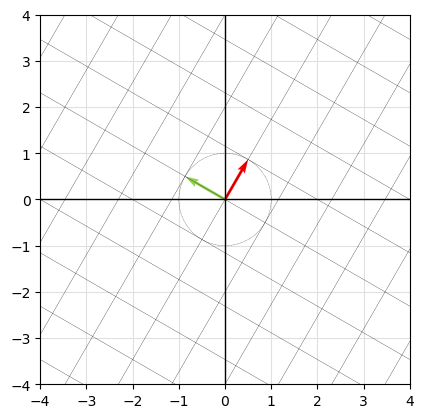

In [11]:
fig, ax = plt.subplots()

# 绘制单位圆
ax.plot(x1_array, x2_array, lw = 0.2, c = 'k', ls = '--')

# 绘制箭头
ax.quiver(0, 0, a1[0], a1[1], 
          angles='xy', scale_units='xy', 
          scale=1, color='r')
ax.quiver(0, 0, a2[0], a2[1], 
          angles='xy', scale_units='xy', 
          scale=1, color='#92D050')

# 绘制旋转网格，请思考有其他方法绘制网格
grid_range = np.arange(-10, 11)
for i in grid_range:
    start = i * a1 + grid_range[0] * a2
    end = i * a1 + grid_range[-1] * a2
    ax.plot([start[0], end[0]], [start[1], end[1]], color='k', lw=0.2)  # a2 方向线

for j in grid_range:
    start = grid_range[0] * a1 + j * a2
    end = grid_range[-1] * a1 + j * a2
    ax.plot([start[0], end[0]], [start[1], end[1]], color='k', lw=0.2)  # a1 方向线
    
# 装饰
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.axhline(0, color='k', linewidth=1)
ax.axvline(0, color='k', linewidth=1)
ax.grid(c = '0.88')

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  